<a href="https://colab.research.google.com/github/dlgallegose/SWIM_V3.1/blob/main/Evapotranspiration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('Vapor-Pressure.csv')


data['LocalDateTime'] = pd.to_datetime(data['LocalDateTime'])
data['Date'] = data['LocalDateTime'].dt.date

# Calculate the daily average vapor pressure
daily_average_vapor_pressure = data.groupby('Date')['DataValue'].mean().reset_index()

<ipython-input-2-0f115dbaca83>:1: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Vapor-Pressure.csv')


In [ ]:
import pandas as pd
import numpy as np

# Clausius-Clapeyron equation constants
T0 = 273.15  # Reference temperature in Kelvin
Lv = 2.501e6  # Latent heat of vaporization for water in J/kg
Rv = 461.5  # Specific gas constant for water vapor in J/(kg·K)

temp_data = pd.read_csv('Temp.txt', delimiter=', ')

temp_data['AvgTemperature'] = pd.to_numeric(temp_data['AvgTemperature'], errors='coerce')
temp_data['Celsius_Temperature'] = (temp_data['AvgTemperature'] - 32) * 5/9
temp_data['Kelvin_Temperature'] = temp_data['Celsius_Temperature'] + T0

temp_data['Saturation Vapor Pressure (Pa)'] = 611.2 * np.exp((17.67 * (temp_data['Kelvin_Temperature'] - T0)) / (temp_data['Kelvin_Temperature'] - 29.65))

temp_data['Saturation Vapor Pressure (hPa)'] = temp_data['Saturation Vapor Pressure (Pa)'] / 100.0

vapor_data = pd.read_csv('Vapor-Pressure.csv')
vapor_data['LocalDateTime'] = pd.to_datetime(vapor_data['LocalDateTime'])
vapor_data['Date'] = vapor_data['LocalDateTime'].dt.date

# Calculate the daily average vapor pressure
daily_avg_vapor_pressure = vapor_data.groupby('Date')['DataValue'].mean().reset_index()

# Calculate the Vapor Pressure Deficit (VPD) in kPa
daily_avg_vapor_pressure['Saturation Vapor Pressure (hPa)'] = temp_data['Saturation Vapor Pressure (hPa)']
daily_avg_vapor_pressure['VPD (kPa)'] = daily_avg_vapor_pressure['Saturation Vapor Pressure (hPa)'] - daily_avg_vapor_pressure['DataValue']
print(daily_avg_vapor_pressure[['Date', 'DataValue', 'Saturation Vapor Pressure (hPa)', 'VPD (kPa)']])


<ipython-input-3-98f0300cebf9>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temp_data = pd.read_csv('Temp.txt', delimiter=', ')
<ipython-input-3-98f0300cebf9>:19: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  vapor_data = pd.read_csv('Vapor-Pressure.csv')


            Date  DataValue  Saturation Vapor Pressure (hPa)  VPD (kPa)
0     2009-10-19   0.870000                         7.912717   7.042717
1     2009-10-20   1.205000                         8.721465   7.516465
2     2009-10-21   1.046667                        10.168048   9.121382
3     2009-10-22   0.810000                         9.064899   8.254899
4     2009-10-23   0.619167                         9.241059   8.621892
...          ...        ...                              ...        ...
5045  2023-11-03   1.520417                        19.295259  17.774843
5046  2023-11-04   1.617500                        21.062443  19.444943
5047  2023-11-05   1.735000                        22.189648  20.454648
5048  2023-11-06   2.098750                        24.603988  22.505238
5049  2023-11-07   2.255000                        17.040495  14.785495

[5050 rows x 4 columns]


In [ ]:
temp_data['VPD (kPa)'] = daily_avg_vapor_pressure['VPD (kPa)']

In [ ]:
A = 17.27
B = 237.3

# Function to calculate the rate of change of saturation specific humidity (Δ) in (Pa K⁻¹)

es = daily_avg_vapor_pressure['Saturation Vapor Pressure (hPa)']

daily_avg_vapor_pressure['Delta'] = (es * A) / ((temp_data['Kelvin_Temperature'] + B) ** 2)

# Print the calculated Δ
print(daily_avg_vapor_pressure[['Date', 'DataValue', 'Saturation Vapor Pressure (hPa)', 'VPD (kPa)', 'Delta']])


            Date  DataValue  Saturation Vapor Pressure (hPa)  VPD (kPa)  \
0     2009-10-19   0.870000                         7.912717   7.042717   
1     2009-10-20   1.205000                         8.721465   7.516465   
2     2009-10-21   1.046667                        10.168048   9.121382   
3     2009-10-22   0.810000                         9.064899   8.254899   
4     2009-10-23   0.619167                         9.241059   8.621892   
...          ...        ...                              ...        ...   
5045  2023-11-03   1.520417                        19.295259  17.774843   
5046  2023-11-04   1.617500                        21.062443  19.444943   
5047  2023-11-05   1.735000                        22.189648  20.454648   
5048  2023-11-06   2.098750                        24.603988  22.505238   
5049  2023-11-07   2.255000                        17.040495  14.785495   

         Delta  
0     0.000517  
1     0.000567  
2     0.000655  
3     0.000588  
4     0.000599

In [ ]:
temp_data['Delta'] = daily_avg_vapor_pressure['Delta']

In [ ]:
temp_data['VPD (kPa)'] = daily_avg_vapor_pressure['VPD (kPa)']

In [ ]:
data = pd.read_csv('Global-Radiation-Las-Cruces.csv')

data['LocalDateTime'] = pd.to_datetime(data['LocalDateTime'])
data['TimeDifference (hours)'] = (data['LocalDateTime'] - data['LocalDateTime'].shift()).dt.total_seconds() / 3600

# Calculate daily net radiation in MJ/m²/day
data['Net Radiation (MJ/m²/day)'] = data['DataValue'] * data['TimeDifference (hours)'] / 3600  # Conversion from W/m² to MJ/m²/day

daily_net_radiation = data.groupby(data['LocalDateTime'].dt.date)['Net Radiation (MJ/m²/day)'].sum().reset_index()
print(daily_net_radiation)


<ipython-input-8-d0ac18f9335c>:1: DtypeWarning: Columns (2,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Global-Radiation-Las-Cruces.csv')


     LocalDateTime  Net Radiation (MJ/m²/day)
0       2009-10-19                  -3.992896
1       2009-10-20                   1.145272
2       2009-10-21                   0.193053
3       2009-10-22                   0.000378
4       2009-10-23                   1.485392
...            ...                        ...
5121    2023-10-27                   1.444583
5122    2023-10-28                   1.440722
5123    2023-10-29                   1.396969
5124    2023-10-30                   1.046203
5125    2023-10-31                   1.435967

[5126 rows x 2 columns]


In [ ]:
temp_data['Net Radiation (MJ/m²/day)'] = daily_net_radiation["Net Radiation (MJ/m²/day)"]

In [ ]:
data = pd.read_csv('Soil-Heat-Flux Sandia.csv')

data['LocalDateTime'] = pd.to_datetime(data['LocalDateTime'])
data['TimeDifference (hours)'] = (data['LocalDateTime'] - data['LocalDateTime'].shift()).dt.total_seconds() / 3600

# Calculate daily soil heat flux in MJ/m²/day
data['Soil Heat Flux (MJ/m²/day)'] = data['DataValue'] * data['TimeDifference (hours)'] / 3600  # Conversion from MJ/m²/h to MJ/m²/day
daily_soil_heat_flux = data.groupby(data['LocalDateTime'].dt.date)['Soil Heat Flux (MJ/m²/day)'].sum().reset_index()
print(daily_soil_heat_flux)


     LocalDateTime  Soil Heat Flux (MJ/m²/day)
0       2012-06-20                 -816.068870
1       2012-06-21                    0.074403
2       2012-06-22                    0.079933
3       2012-06-23                    0.097519
4       2012-06-24                    0.072000
...            ...                         ...
2279    2018-10-26                   -0.163188
2280    2018-10-27                   -0.143479
2281    2018-10-28                   -0.115924
2282    2018-10-29                   -0.097819
2283    2018-10-30                   -0.071292

[2284 rows x 2 columns]


In [ ]:
temp_data['Soil Heat Flux (MJ/m²/day)'] = daily_soil_heat_flux["Soil Heat Flux (MJ/m²/day)"]

In [ ]:
data = pd.read_csv('Wind-Speed.csv')
data['LocalDateTime'] = pd.to_datetime(data['LocalDateTime'])

# Group the data by day and calculate daily average wind speed
daily_average_wind_speed = data.groupby(data['LocalDateTime'].dt.date)['DataValue'].mean().reset_index()
print(daily_average_wind_speed)


      LocalDateTime  DataValue
0        1979-01-01   2.743077
1        1979-01-02   1.310000
2        1979-01-03   0.282000
3        1979-01-04   0.643939
4        1979-01-05   1.315937
...             ...        ...
16230    2023-10-27   1.968333
16231    2023-10-28   1.629375
16232    2023-10-29   2.055625
16233    2023-10-30   1.098846
16234    2023-10-31   0.712000

[16235 rows x 2 columns]


In [ ]:
temp_data['Wind Speed (m/s)'] = daily_average_wind_speed["DataValue"]

In [ ]:

delta = temp_data['Delta']
Rn = temp_data['Net Radiation (MJ/m²/day)']
G = temp_data['Soil Heat Flux (MJ/m²/day)']
T = temp_data['Kelvin_Temperature']
u2 = temp_data['Wind Speed (m/s)']
delta_e = temp_data['VPD (kPa)']
gamma = 66

ET0_numerator = 0.408 * delta * (Rn - G) + (900 / T) * gamma * u2 * delta_e
ET0_denominator = delta + gamma * (1 + 0.34 * u2)
ET0 = ET0_numerator / ET0_denominator

temp_data['ET0 (mm day⁻¹)'] = ET0

daily_avg_ET0 = temp_data.groupby('Date')['ET0 (mm day⁻¹)'].mean()

print("Estimated Daily Average ET0 (mm day⁻¹) by Date:")
print(daily_avg_ET0)




Estimated Daily Average ET0 (mm day⁻¹) by Date:
Date
2010-01-01    32.507196
2010-01-02    22.042346
2010-01-03     7.534429
2010-01-04    14.082131
2010-01-05    25.287462
                ...    
2023-10-27          NaN
2023-10-28          NaN
2023-10-29          NaN
2023-10-30          NaN
2023-10-31          NaN
Name: ET0 (mm day⁻¹), Length: 5052, dtype: float64


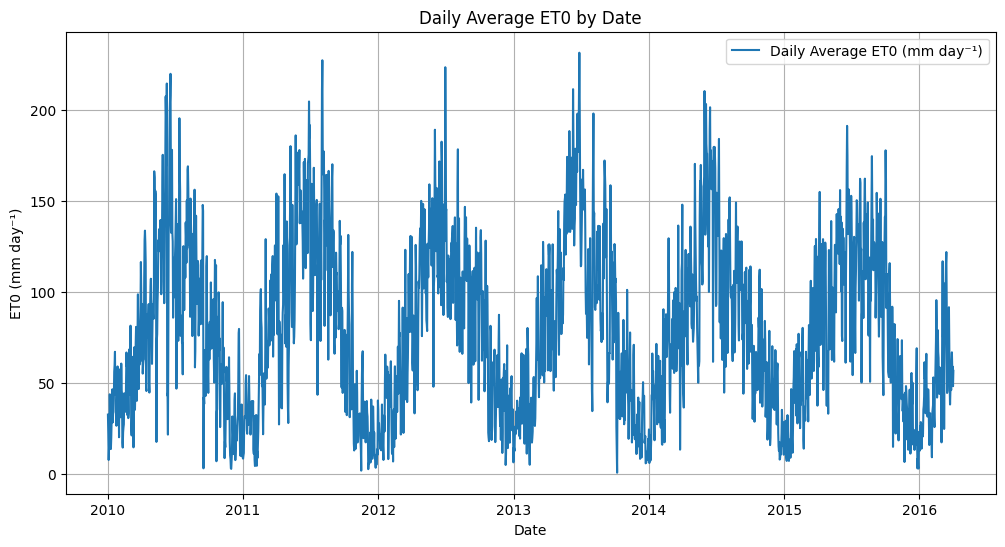

In [ ]:
import matplotlib.pyplot as plt

daily_avg_ET0.index = pd.to_datetime(daily_avg_ET0.index)
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_ET0.index, daily_avg_ET0.values, label='Daily Average ET0 (mm day⁻¹)')
plt.xlabel('Date')
plt.ylabel('ET0 (mm day⁻¹)')
plt.title('Daily Average ET0 by Date')
plt.legend()
plt.grid()
plt.show()

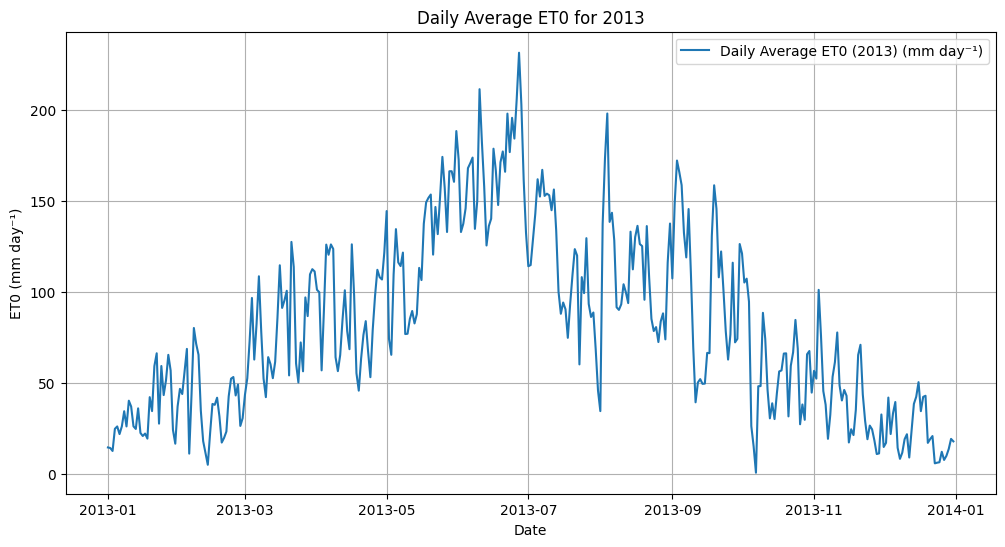

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'daily_avg_ET0' is your DataFrame with a datetime index
daily_avg_ET0.index = pd.to_datetime(daily_avg_ET0.index)

# Specify the year you want to plot
desired_year = 2013  # Replace with the year you want

# Filter data for the desired year
filtered_data = daily_avg_ET0[daily_avg_ET0.index.year == desired_year]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data.values, label=f'Daily Average ET0 ({desired_year}) (mm day⁻¹)')
plt.xlabel('Date')
plt.ylabel('ET0 (mm day⁻¹)')
plt.title(f'Daily Average ET0 for {desired_year}')
plt.legend()
plt.grid()
plt.show()
